### Drawing Shapes on images using Mouse
We can use callbacks to connect images to evet functions using openCV. By this way we can connect with images and videos directly.

Main Goals:
1. Connecting callback functions
2. Adding functionality through event choices
3. Dragging the mouse for functionality.

## Drawing a Circle Images with Mouse

In [1]:
import cv2
import numpy as np

# Event Function
# we are connecting this function using setMouseCallback, 
# that function will pass some parameter like event, (x,y) coorinates, some flags and param
def draw_circle(event, x, y , flags, param):
    
    # If the left mouse button pressed on the image that the particular coorinate will be considered as center 
    # and will draw a green circle with radius 100.  
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 100, (0,255,0), -1)
    
    # If the right mouse button pressed on the image that the particular coorinate will be considered as center 
    # and will draw a red circle with radius 100.
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 100, (0,0,255), -1)
    

cv2.namedWindow(winname = 'my_drawing')

# Connecting the event function to the image callback by passing the window name.
# Later, while showing the img through cv2 this callback will happen
cv2.setMouseCallback('my_drawing', draw_circle)

img = np.zeros((512,512,3))
while True:
    # The event function gets connected through the name in the actually window that we are passing as title
    cv2.imshow('my_drawing', img)

    # Need to press esc key to quit the loop
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

## Drawing a Rectangle Images with Mouse

In [2]:
import cv2
import numpy as np

# ** Variables ** 
# Title of the window 
window_name = 'rect_window'

# Flag - True when mouse button down and False when mouse button up
drawing = False
# co-ordinates of the rectangle
ix, iy = -1, -1

# event function
def draw_rectangle(event, x, y, flags, params):
    
    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(img, (ix, iy), (x,y), (0,255,0), -1)
    
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, (ix, iy), (x,y), (0,255,0), -1)

cv2.namedWindow(winname = window_name)
cv2.setMouseCallback(window_name, draw_rectangle)

img = np.zeros((512,512,3))

while True:
    cv2.imshow(window_name, img)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


## Assessment

### Task 1: Open the dog backpack image and display it in RGB order

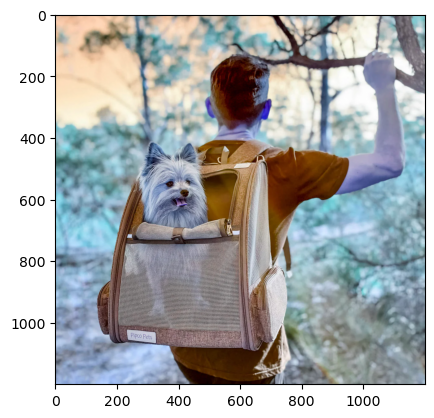

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

dog_bagpack_img = cv2.imread('../dataset/img/dog-backpack.jpg') # cv reads image as Blue Green Red
plt.imshow(dog_bagpack_img)
plt.show()

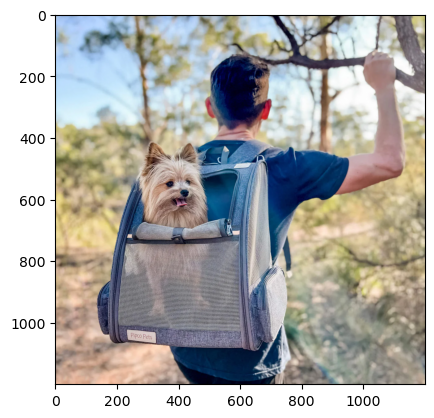

In [4]:
converted_img = cv2.cvtColor(dog_bagpack_img, cv2.COLOR_BGR2RGB)
plt.imshow(converted_img)
plt.show()

### Task 2: Flip the image upside down

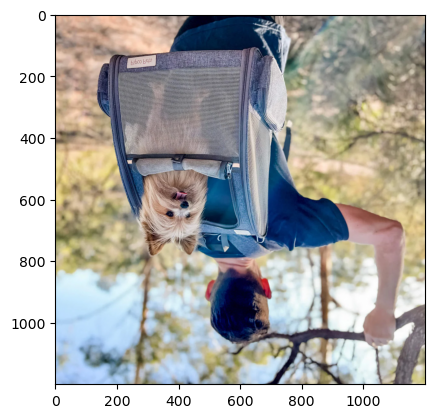

In [5]:
upside_flip_img = cv2.flip(converted_img,  0)
plt.imshow(upside_flip_img)
plt.show()

### Task 3: Draw a empty red rectangle around the dog face and display it 

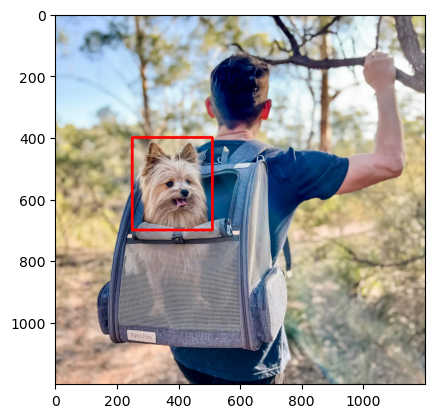

In [6]:
img = converted_img.copy()
# pt1 - top left corner
# pt2 - bottom right corner
plt.imshow(cv2.rectangle(img, (250,400), (510,700), (255, 0, 0), 8))
plt.show()

### Task 4: Draw a empty blue rectangle around the human face and display it 

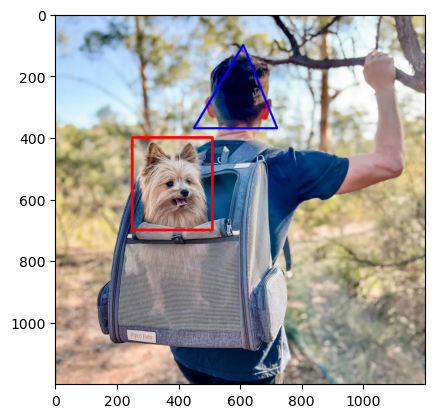

In [7]:
vertices = np.array([ [610, 100], [450, 370] ,[720, 370] ]) # no color channels available
# adding color channels by reshaping the array to 3D
points = np.reshape(vertices, (-1,1,2))
plt.imshow(cv2.polylines(img, [points], True, (0,0,255), 5))
plt.show()

#### Bonus Task: Fill the triangle with blue

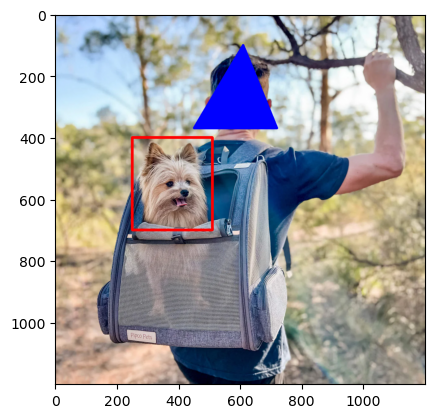

In [8]:
plt.imshow(cv2.fillPoly(img, [points], (0,0,255)))
plt.show()

### Task 5: Draw empty red circle when right mouse button clicked

In [9]:
import cv2

window_name = "circle_zoro"

# Function
def circle_zoro(event, x, y, flags, params):
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 50, (0,0,255), 5)

cv2.namedWindow(winname = window_name)
# connection
cv2.setMouseCallback(window_name, circle_zoro)

# reading image
img = cv2.imread("../dataset/img/zoro.jpg")

while True:
    # showing
    cv2.imshow(window_name, img)

    # handling quit
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
